<a href="https://colab.research.google.com/github/MurilloBrandao1407/E.P.---Trabalho-em-grupo/blob/main/E_P_Code_Murillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

caminho = '/content/drive/MyDrive/Dataset/d1dos_meteorologicos_tratado.csv'

try:
    df = pd.read_csv(caminho)
    print("Dados carregados com sucesso!")

    df.fillna(df.mean(numeric_only=True), inplace=True)

    df['Data Medicao'] = pd.to_datetime(df['Data Medicao'], errors='coerce')

    df.columns = ['data', 'insolacao', 'precipitacao', 'temp_max', 'temp_min', 'umidade', 'vento']

    df['chuva_extrema'] = (df['precipitacao'] > 20).astype(int)
    display(df.head(10960))
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {caminho}")
except pd.errors.ParserError:
    print("Erro ao analisar o CSV. Verifique o formato do arquivo.")
except Exception as e:
    print(f"Erro inesperado: {e}")

Mounted at /content/drive
Dados carregados com sucesso!


,data,insolacao,precipitacao,temp_max,temp_min,umidade,vento,chuva_extrema
0,1995-01-01,5.0,30.900000,31.4,21.500000,85.5,0.5,1
1,1995-01-02,2.5,3.400000,31.1,21.300000,77.8,0.0,0
2,1995-01-03,0.4,2.200000,30.6,23.000000,82.0,1.0,0
3,1995-01-04,1.9,0.000000,30.8,23.200000,86.8,2.2,0
4,1995-01-05,0.9,3.400000,28.2,23.000000,85.8,0.7,0
...,...,...,...,...,...,...,...,...
10954,2024-12-28,4.0,3.800000,30.0,25.600000,77.3,1.0,0
10955,2024-12-29,0.6,0.000000,30.2,25.200000,88.5,1.0,0
10956,2024-12-30,5.4,6.603834,31.5,24.224926,77.0,0.5,0
10957,2024-12-31,8.1,1.200000,34.0,24.000000,69.3,1.0,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_reg = df[['insolacao', 'precipitacao', 'temp_min', 'umidade', 'vento']]
y_reg = df['temp_max']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

modelo_linear = LinearRegression()
modelo_linear.fit(X_train_reg, y_train_reg)

y_pred_reg = modelo_linear.predict(X_test_reg)

print("Regressão Linear:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R²:", r2_score(y_test_reg, y_pred_reg))


Regressão Linear:
RMSE: 1.2644516608154863
R²: 0.6729235194491763


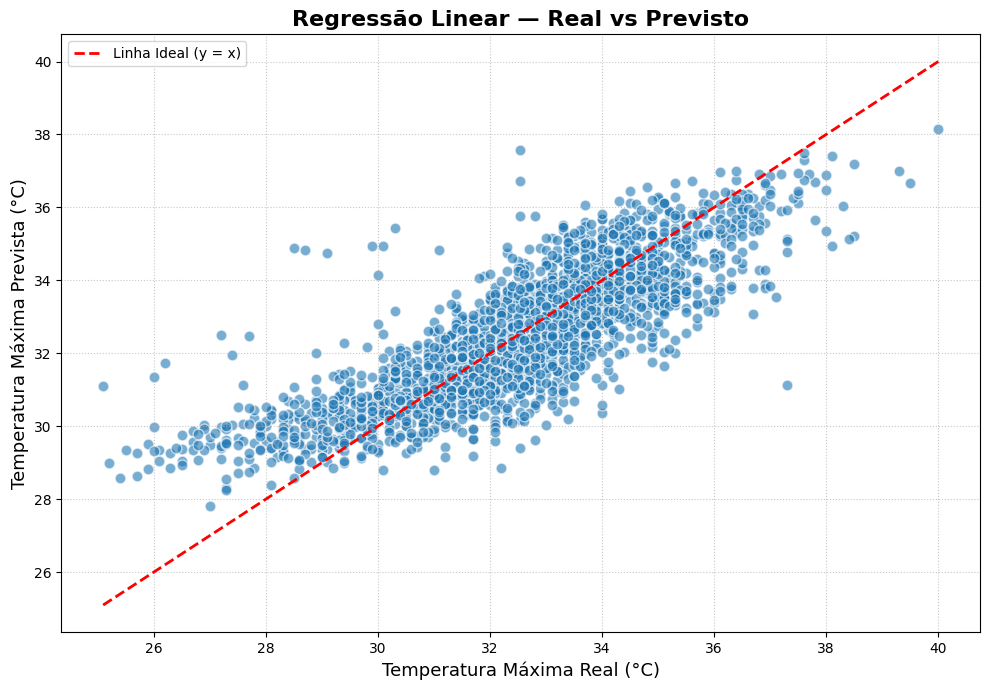

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='#1f77b4', edgecolors='w', s=60)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()],
         color='red', linestyle='--', linewidth=2, label='Linha Ideal (y = x)')

plt.xlabel('Temperatura Máxima Real (°C)', fontsize=13)
plt.ylabel('Temperatura Máxima Prevista (°C)', fontsize=13)
plt.title('Regressão Linear — Real vs Previsto', fontsize=16, weight='bold')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

X_clf = X_reg  # Mesmas features
y_clf = df['chuva_extrema']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_clf, y_train_clf)

y_pred_log = modelo_log.predict(X_test_clf)
y_proba_log = modelo_log.predict_proba(X_test_clf)[:, 1]

print("\nRegressão Logística:")
print("F1 Score:", f1_score(y_test_clf, y_pred_log))
print("AUC-ROC:", roc_auc_score(y_test_clf, y_proba_log))
print("Acurácia:", accuracy_score(y_test_clf, y_pred_log))



Regressão Logística:
F1 Score: 0.9978947368421053
AUC-ROC: 1.0
Acurácia: 0.9995437956204379


Distribuição da variável 'chuva_extrema':
chuva_extrema
0    0.892417
1    0.107583
Name: proportion, dtype: float64



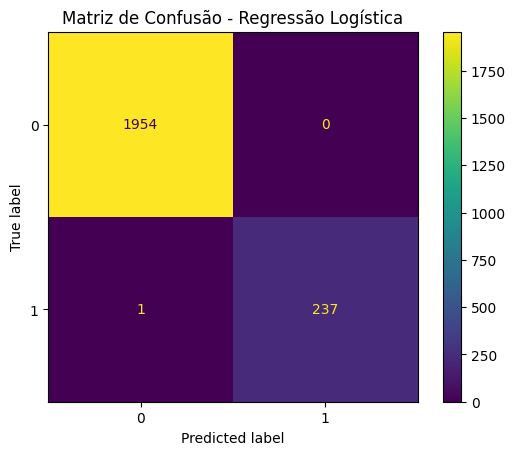

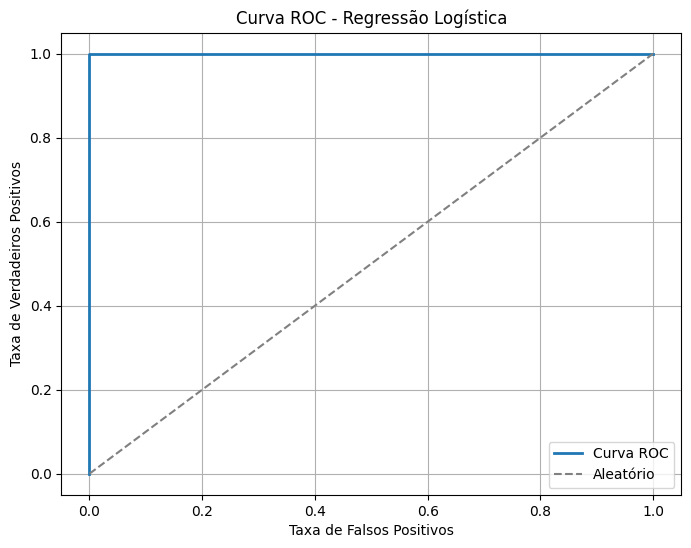

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay

print("Distribuição da variável 'chuva_extrema':")
print(df['chuva_extrema'].value_counts(normalize=True))
print()

ConfusionMatrixDisplay.from_estimator(modelo_log, X_test_clf, y_test_clf)
plt.title("Matriz de Confusão - Regressão Logística")
plt.grid(False)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test_clf, y_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-26-8cefa82e9b98>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chuva_extrema', data=df, palette=['#66c2a5', '#fc8d62'])


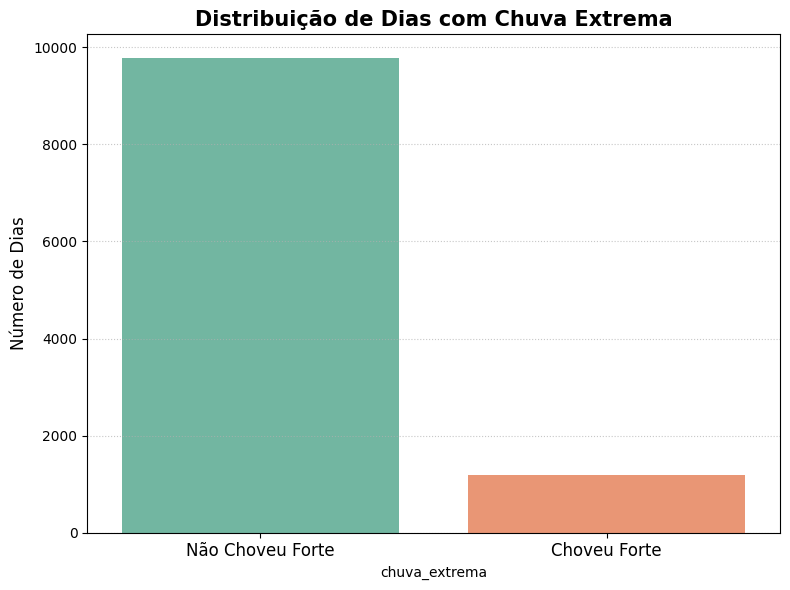

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='chuva_extrema', data=df, palette=['#66c2a5', '#fc8d62'])

plt.xticks([0, 1], ['Não Choveu Forte', 'Choveu Forte'], fontsize=12)
plt.ylabel('Número de Dias', fontsize=12)
plt.title('Distribuição de Dias com Chuva Extrema', fontsize=15, weight='bold')
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Added import
import numpy as np

X = df[['insolacao', 'precipitacao', 'temp_min', 'umidade', 'vento']]
y = df['temp_max']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("Decision Tree:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("  R²:", r2_score(y_test, y_pred_tree))

print("\nRandom Forest:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))
print("  R²:", r2_score(y_test, y_pred_forest))

print("\nXGBoost:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("  R²:", r2_score(y_test, y_pred_xgb))

Decision Tree:
  RMSE: 1.6639086737601483
  R²: 0.4336253263884863

Random Forest:
  RMSE: 1.2115046402526382
  R²: 0.6997417027896994

XGBoost:
  RMSE: 1.2160709462111259
  R²: 0.6974740183388075


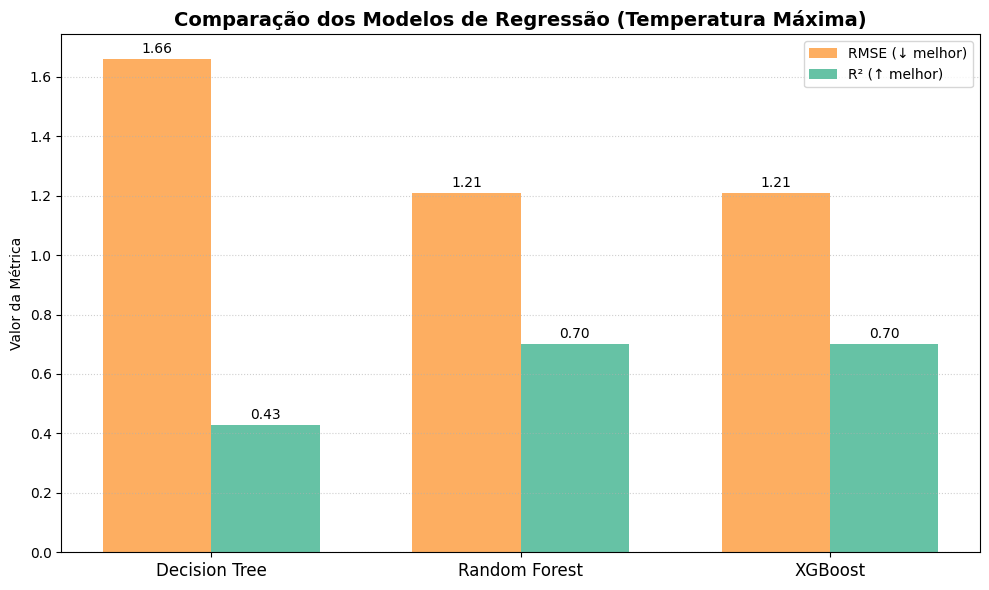

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

modelos = ['Decision Tree', 'Random Forest', 'XGBoost']
rmse = [1.66, 1.21, 1.21]
r2 = [0.43, 0.70, 0.70]

x = np.arange(len(modelos))
largura = 0.35

plt.figure(figsize=(10, 6))
b1 = plt.bar(x - largura/2, rmse, width=largura, color='#fdae61', label='RMSE (↓ melhor)')
b2 = plt.bar(x + largura/2, r2, width=largura, color='#66c2a5', label='R² (↑ melhor)')
for barra in b1:
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.02,
             f'{barra.get_height():.2f}', ha='center', fontsize=10)
for barra in b2:
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.02,
             f'{barra.get_height():.2f}', ha='center', fontsize=10)

plt.xticks(x, modelos, fontsize=12)
plt.title('Comparação dos Modelos de Regressão (Temperatura Máxima)', fontsize=14, weight='bold')
plt.ylabel('Valor da Métrica')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_linear = LinearRegression()
modelo_linear.fit(X_train_reg, y_train_reg)
y_pred_reg = modelo_linear.predict(X_test_reg)


def avaliar_modelo(nome, y_test, y_pred):
    print(f'{nome}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
    print(f'R²: {r2_score(y_test, y_pred):.4f}')
    print(f'Explained Variance: {explained_variance_score(y_test, y_pred):.4f}')
    print()

avaliar_modelo('Regressão Linear', y_test_reg, y_pred_reg)
avaliar_modelo('Decision Tree', y_test, y_pred_tree)
avaliar_modelo('Random Forest', y_test, y_pred_forest)
avaliar_modelo('XGBoost', y_test, y_pred_xgb)

Regressão Linear
RMSE: 1.2645
R²: 0.6729
Explained Variance: 0.6729

Decision Tree
RMSE: 1.6639
R²: 0.4336
Explained Variance: 0.4341

Random Forest
RMSE: 1.2115
R²: 0.6997
Explained Variance: 0.6997

XGBoost
RMSE: 1.2161
R²: 0.6975
Explained Variance: 0.6975



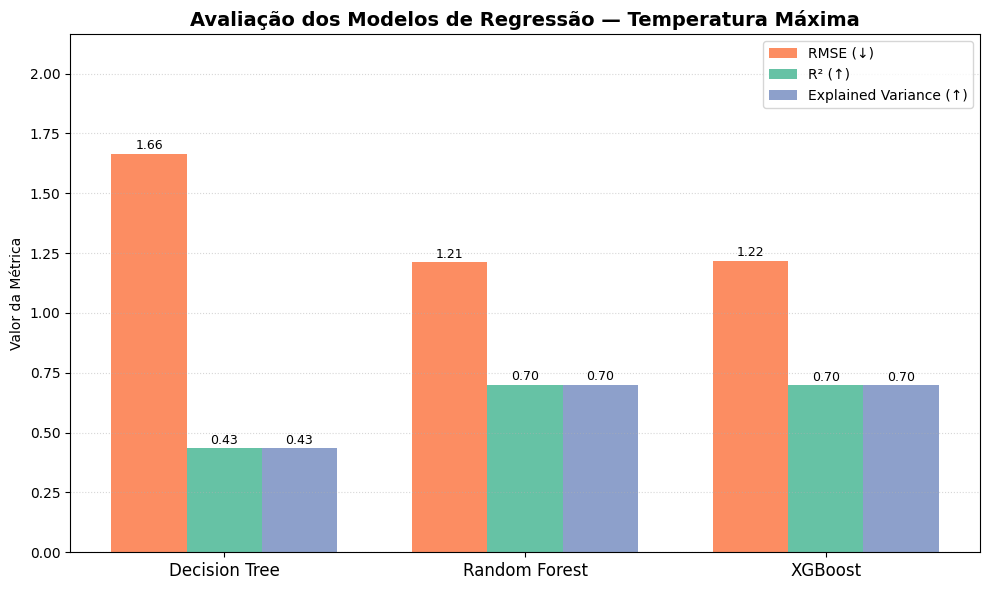

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

modelos = ['Decision Tree', 'Random Forest', 'XGBoost']
rmse = [1.6639, 1.2115, 1.2161]
r2 = [0.4336, 0.6997, 0.6975]
evs = [0.4341, 0.6997, 0.6975]

x = np.arange(len(modelos))
largura = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - largura, rmse, width=largura, label='RMSE (↓)', color='#fc8d62')
plt.bar(x, r2, width=largura, label='R² (↑)', color='#66c2a5')
plt.bar(x + largura, evs, width=largura, label='Explained Variance (↑)', color='#8da0cb')

for i in range(len(modelos)):
    plt.text(x[i] - largura, rmse[i] + 0.02, f'{rmse[i]:.2f}', ha='center', fontsize=9)
    plt.text(x[i], r2[i] + 0.02, f'{r2[i]:.2f}', ha='center', fontsize=9)
    plt.text(x[i] + largura, evs[i] + 0.02, f'{evs[i]:.2f}', ha='center', fontsize=9)

plt.xticks(x, modelos, fontsize=12)
plt.title('Avaliação dos Modelos de Regressão — Temperatura Máxima', fontsize=14, weight='bold')
plt.ylabel('Valor da Métrica')
plt.ylim(0, max(rmse) + 0.5)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

def avaliar_classificador(nome, y_true, y_pred, y_proba):
    print(f'{nome}')
    print(f'F1-Score: {f1_score(y_true, y_pred):.4f}')
    print(f'AUC-ROC: {roc_auc_score(y_true, y_proba):.4f}')
    print(f'Acurácia: {accuracy_score(y_true, y_pred):.4f}')
    print()

# Avaliar a regressão logística
avaliar_classificador("Regressão Logística", y_test_clf, y_pred_log, y_proba_log)


Regressão Logística
F1-Score: 0.9979
AUC-ROC: 1.0000
Acurácia: 0.9995



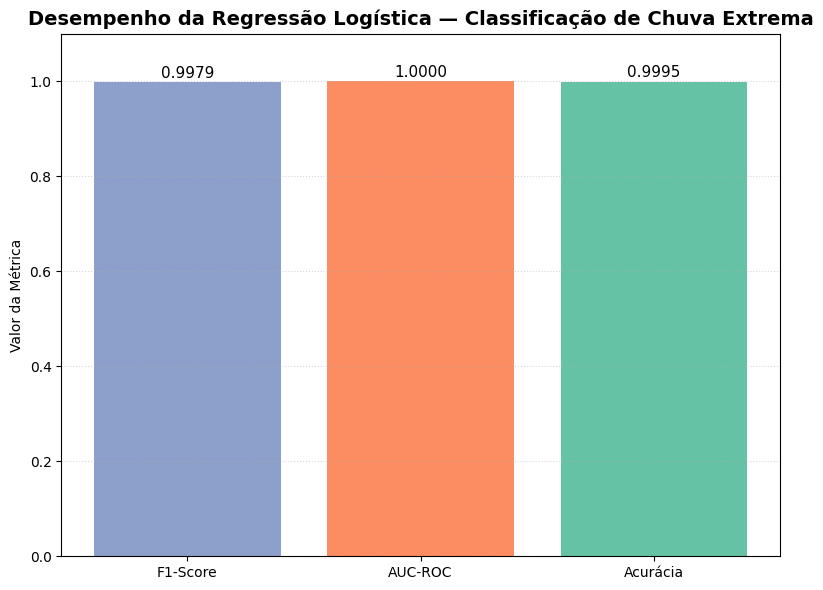

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score # Added import

f1 = f1_score(y_test_clf, y_pred_log)
auc = roc_auc_score(y_test_clf, y_proba_log)
acc = accuracy_score(y_test_clf, y_pred_log)

metricas = ['F1-Score', 'AUC-ROC', 'Acurácia']
valores = [f1, auc, acc]
cores = ['#8da0cb', '#fc8d62', '#66c2a5']

plt.figure(figsize=(8, 6))
bars = plt.bar(metricas, valores, color=cores)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{bar.get_height():.4f}', ha='center', fontsize=11)

plt.ylim(0, 1.1)
plt.title('Desempenho da Regressão Logística — Classificação de Chuva Extrema', fontsize=14, weight='bold')
plt.ylabel('Valor da Métrica')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()